👥 Gender Counts:
 gender
Female    58552
Male      41430
Other        18
Name: count, dtype: int64

📊 Gender Ratio:
 gender
Female    0.586
Male      0.414
Other     0.000
Name: proportion, dtype: float64


C:\Users\USER\AppData\Local\Temp\ipykernel_16248\3513243271.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='diabetes', y=col, ax=axes[i], palette='Set2')
C:\Users\USER\AppData\Local\Temp\ipykernel_16248\3513243271.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='diabetes', y=col, ax=axes[i], palette='Set2')


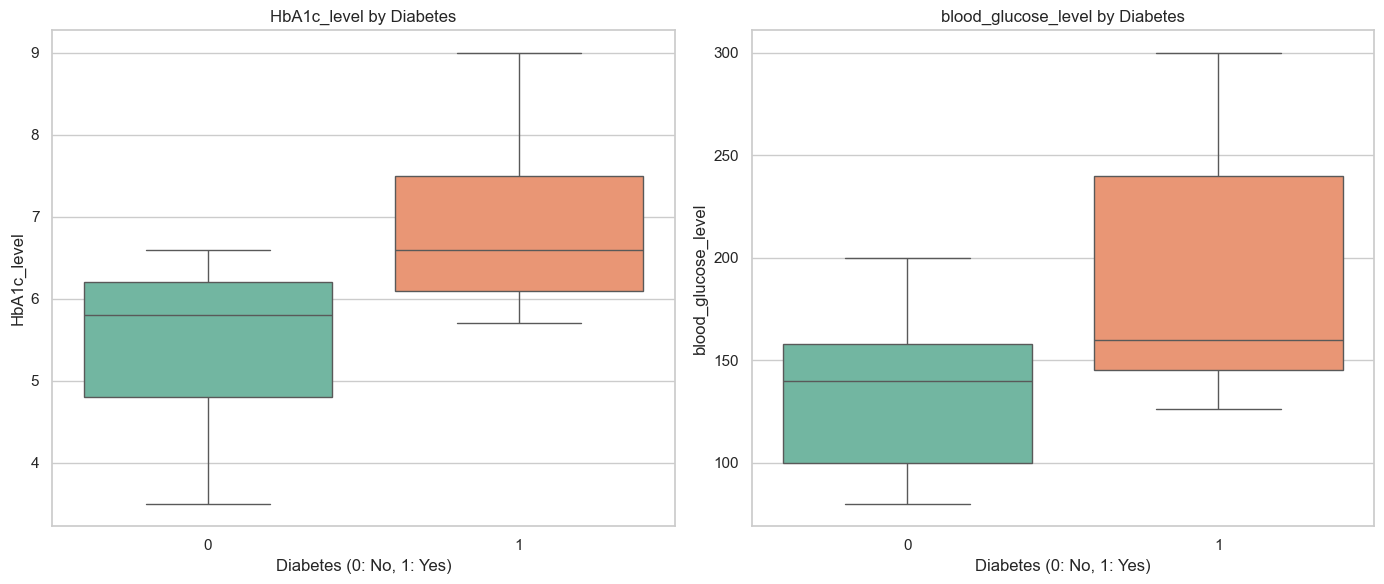

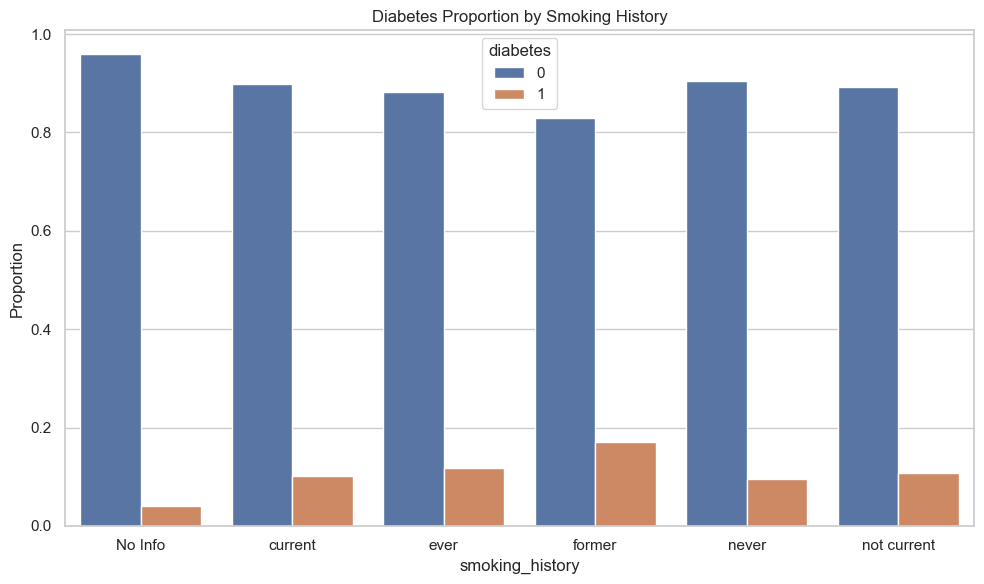

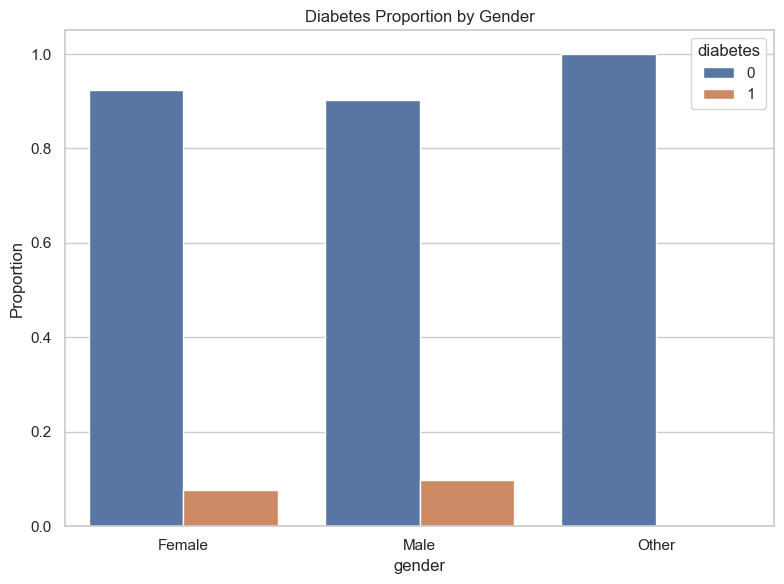

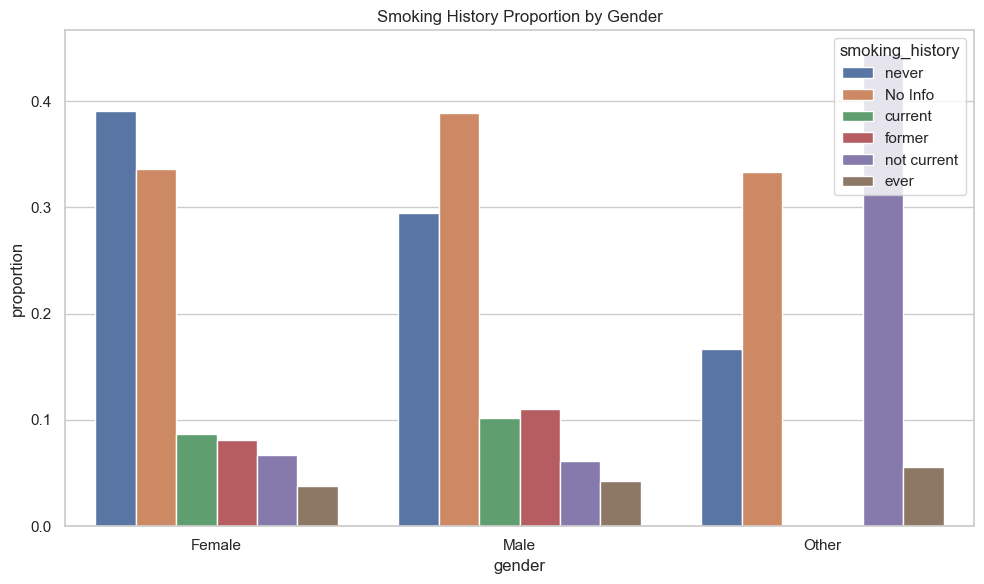

C:\Users\USER\AppData\Local\Temp\ipykernel_16248\3513243271.py:73: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='gender', y=col, ax=axes[i], palette='Set2')
C:\Users\USER\AppData\Local\Temp\ipykernel_16248\3513243271.py:73: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='gender', y=col, ax=axes[i], palette='Set2')


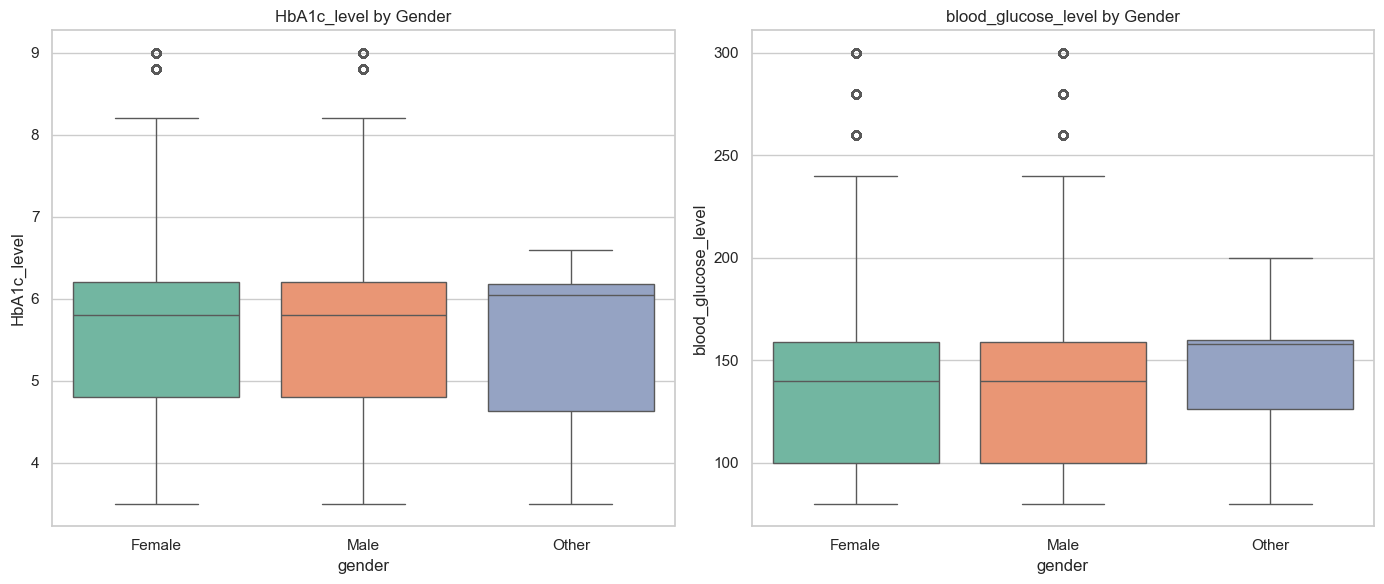

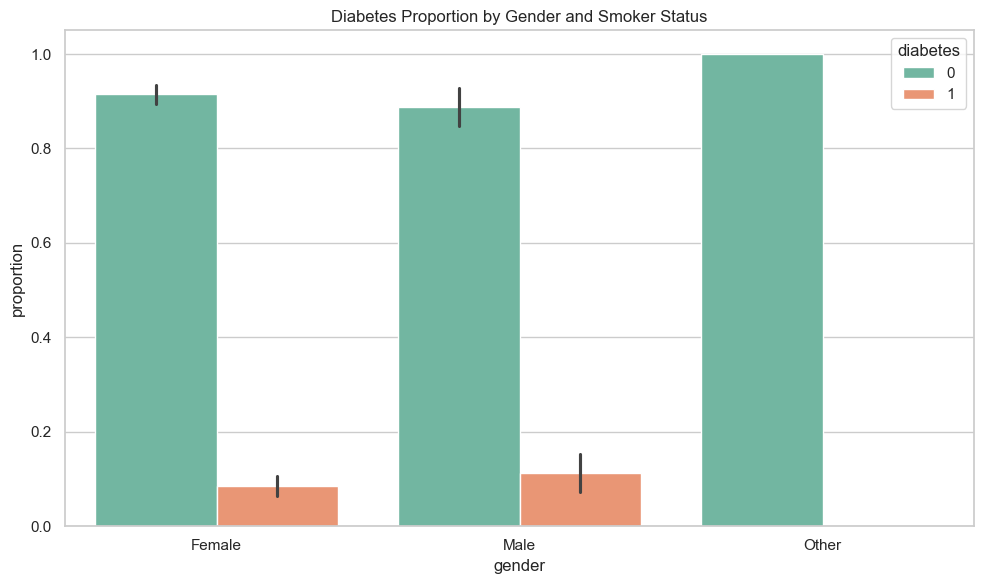

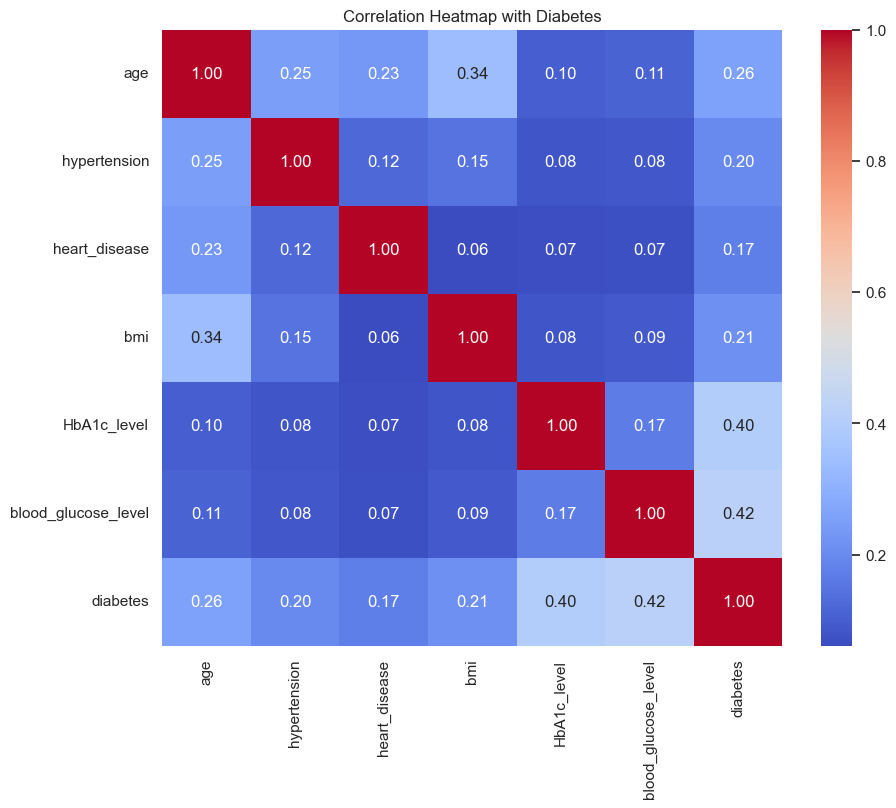

🚬 흡연 이력 범주형 값과 빈도수:
smoking_history
No Info        35816
never          35095
former          9352
current         9286
not current     6447
ever            4004
Name: count, dtype: int64

🚬 흡연 이력 범주형 고유값 목록:
['never' 'No Info' 'current' 'former' 'ever' 'not current']


In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 데이터 불러오기
data_path = '../../data/diabetes_prediction_dataset.csv'
df = pd.read_csv(data_path)

# 시각화 기본 설정
sns.set_theme(style="whitegrid") 
plt.rcParams["figure.figsize"] = (14, 6)

# ✅ 성별 인원수 출력
gender_counts = df['gender'].value_counts()
gender_ratio = df['gender'].value_counts(normalize=True).round(3)
print("👥 Gender Counts:\n", gender_counts)
print("\n📊 Gender Ratio:\n", gender_ratio)

# 1️⃣ 'HbA1c_level', 'blood_glucose_level' boxplot
continuous = ['HbA1c_level', 'blood_glucose_level']
fig, axes = plt.subplots(1, 2, figsize=(14, 6))
for i, col in enumerate(continuous):
    sns.boxplot(data=df, x='diabetes', y=col, ax=axes[i], palette='Set2')
    axes[i].set_title(f'{col} by Diabetes')
    axes[i].set_xlabel('Diabetes (0: No, 1: Yes)')
plt.tight_layout()
plt.show()

# 2️⃣ 'smoking_history' barplot (비율 기반)
fig, ax = plt.subplots(figsize=(10, 6))  
prop_df = (
    df.groupby('smoking_history')['diabetes']
    .value_counts(normalize=True)
    .rename("proportion")
    .reset_index()
)
sns.barplot(data=prop_df, x='smoking_history', y='proportion', hue='diabetes', ax=ax)
ax.set_title("Diabetes Proportion by Smoking History")
ax.set_ylabel("Proportion")
plt.tight_layout()
plt.show()

# 3️⃣ 'gender' barplot (비율 기반)
fig, ax = plt.subplots(figsize=(8, 6))
gender_df = (
    df.groupby('gender')['diabetes']
    .value_counts(normalize=True)
    .rename("proportion")
    .reset_index()
)
sns.barplot(data=gender_df, x='gender', y='proportion', hue='diabetes', ax=ax)
ax.set_title("Diabetes Proportion by Gender")
ax.set_ylabel("Proportion")
plt.tight_layout()
plt.show()

# 4️⃣ 성별에 따른 흡연 비율 (비율 기반 barplot)
smoke_ratio = (
    df.groupby('gender')['smoking_history']
    .value_counts(normalize=True)
    .rename('proportion')
    .reset_index()
)
fig, ax = plt.subplots(figsize=(10, 6))
sns.barplot(data=smoke_ratio, x='gender', y='proportion', hue='smoking_history', ax=ax)
ax.set_title("Smoking History Proportion by Gender")
plt.tight_layout()
plt.show()

# 5️⃣ 성별에 따른 HbA1c_level, blood_glucose_level 분포
fig, axes = plt.subplots(1, 2, figsize=(14, 6))
for i, col in enumerate(['HbA1c_level', 'blood_glucose_level']):
    sns.boxplot(data=df, x='gender', y=col, ax=axes[i], palette='Set2')
    axes[i].set_title(f"{col} by Gender")
plt.tight_layout()
plt.show()

# 6️⃣ 성별 + 흡연 조합에 따른 당뇨 비율
def is_smoker(x):
    return 'yes' if x in ['current', 'ever', 'former', 'not current'] else 'no'
df['smoker'] = df['smoking_history'].apply(is_smoker)

grouped = (
    df.groupby(['gender', 'smoker'])['diabetes']
    .value_counts(normalize=True)
    .rename("proportion")
    .reset_index()
)

fig, ax = plt.subplots(figsize=(10, 6))
sns.barplot(data=grouped, x='gender', y='proportion', hue='diabetes', palette='Set2', ax=ax)
ax.set_title("Diabetes Proportion by Gender and Smoker Status")
plt.tight_layout()
plt.show()

# 7️⃣ 상관관계 히트맵
numeric_df = df.select_dtypes(include=['float64', 'int64'])
corr = numeric_df.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap with Diabetes")
plt.show()

# smoking_history 컬럼의 고유값과 빈도 출력
print("🚬 흡연 이력 범주형 값과 빈도수:")
print(df['smoking_history'].value_counts())

# 고유한 값만 보고 싶다면
print("\n🚬 흡연 이력 범주형 고유값 목록:")
print(df['smoking_history'].unique())
